In [2]:
import pandas as pd

In [3]:
import requests
from requests.auth import HTTPBasicAuth
auth = HTTPBasicAuth('elastic', 'AWbtmGda2Q7BI2bYpdjyF4qd')
url = 'https://8f9677360fc34e2eb943d737b2597c7b.us-east-1.aws.found.io:9243/brasov-dev/_search?size=200000&q=*&sort=TimeStamp:desc'


In [4]:
response = requests.get(url=url, auth=auth)

In [5]:
response

<Response [200]>

In [6]:
import json
data = json.loads(response.text)

In [7]:
data

{'took': 5326,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 10000, 'relation': 'gte'},
  'max_score': None,
  'hits': [{'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'EzI25X8B3mQrnl8XHqm6',
    '_score': None,
    '_source': {'Source': 'Waqi',
     'Sensor': 'no2',
     'Value': 1.2,
     'LocationLat': 45.7167,
     'LocationLong': 25.6333,
     'TimeStamp': 1648818000000,
     'Measurement': 'µg/m3'},
    'sort': [1648818000000]},
   {'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'FDI25X8B3mQrnl8XHqm9',
    '_score': None,
    '_source': {'Source': 'Waqi',
     'Sensor': 'so2',
     'Value': 1.4,
     'LocationLat': 45.7167,
     'LocationLong': 25.6333,
     'TimeStamp': 1648818000000,
     'Measurement': 'µg/m3'},
    'sort': [1648818000000]},
   {'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'FTI25X8B3mQrnl8XHqm9',
    '_score': None,
    '_source': {'Source': 'Waqi',
     'Sen

In [8]:
from pandas import json_normalize
dataframe = json_normalize(data['hits']['hits'])

In [9]:
dataframe

,_index,_type,_id,_score,sort,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement
0,brasov-dev,_doc,EzI25X8B3mQrnl8XHqm6,None,[1648818000000],Waqi,no2,1.2,45.716700,25.633300,1648818000000,µg/m3
1,brasov-dev,_doc,FDI25X8B3mQrnl8XHqm9,None,[1648818000000],Waqi,so2,1.4,45.716700,25.633300,1648818000000,µg/m3
2,brasov-dev,_doc,FTI25X8B3mQrnl8XHqm9,None,[1648818000000],Waqi,pm10,11.0,45.716700,25.633300,1648818000000,µg/m3
3,brasov-dev,_doc,FjI25X8B3mQrnl8XH6ke,None,[1648818000000],Waqi,no2,6.7,45.654271,25.624061,1648818000000,µg/m3
4,brasov-dev,_doc,hjI25X8B3mQrnl8XGKjw,None,[1648818000000],UradMonitor,pm25,10.0,45.653600,25.599000,1648818000000,µg/m3
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,brasov-dev,_doc,pTxpaX4Bwa_bL2zRINoG,None,[1642442400000],Waqi,pm10,11.0,45.634330,25.633872,1642442400000,µg/m3
199996,brasov-dev,_doc,tzxpaX4Bwa_bL2zRJdr9,None,[1642442400000],Waqi,no2,2.8,45.716700,25.633300,1642442400000,µg/m3
199997,brasov-dev,_doc,uDxpaX4Bwa_bL2zRJdr9,None,[1642442400000],Waqi,pm10,36.0,45.716700,25.633300,1642442400000,µg/m3
199998,brasov-dev,_doc,uTxpaX4Bwa_bL2zRJdr-,None,[1642442400000],Waqi,so2,1.1,45.716700,25.633300,1642442400000,µg/m3


In [10]:
dataframe_size = len(dataframe.index)
dataframe_size

200000

<AxesSubplot:>

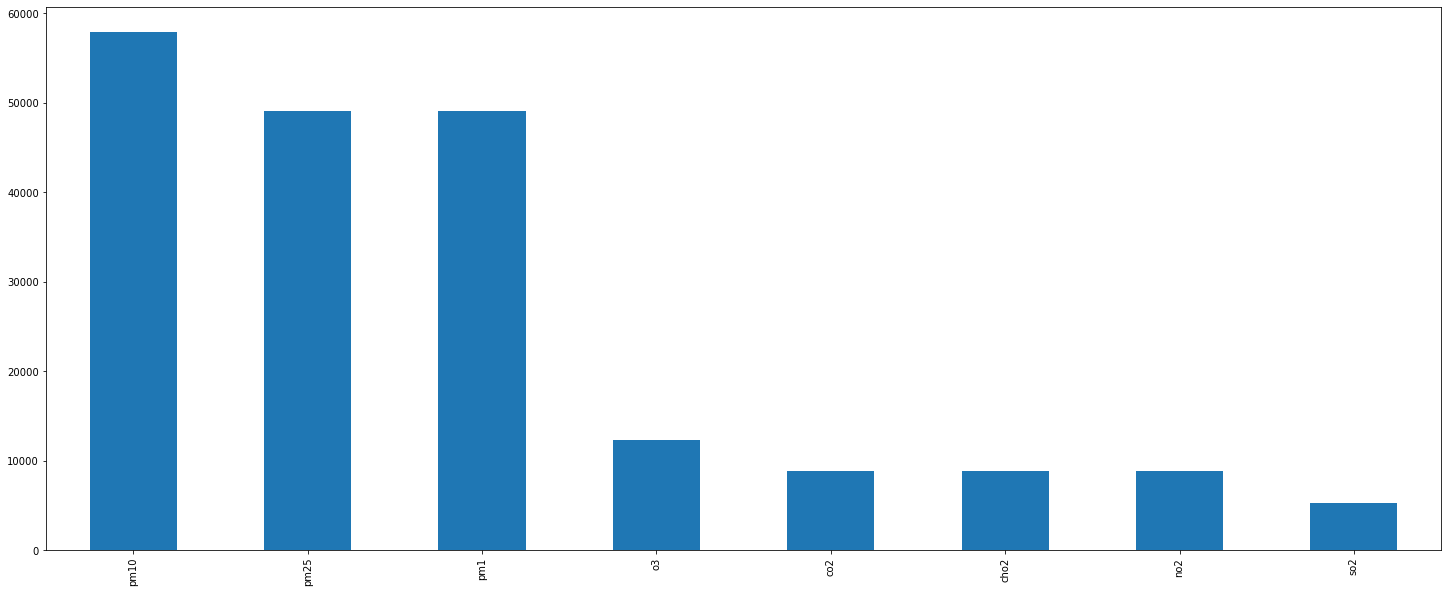

In [11]:
import matplotlib.pyplot as plt
hist_sensor = plt.figure(figsize = (25,10))
ax = hist_sensor.gca()

dataframe.get('_source.Sensor').value_counts().plot(kind='bar')

In [12]:
dataframe['LocationId'] = dataframe['_source.LocationLat']*10000000 + dataframe['_source.LocationLong']*10000000
dataframe['LocationName'] = ""
dataframe.loc[dataframe['LocationId'] == 712668900.0, 'LocationName'] = 'Toamnei' 
dataframe.loc[dataframe['LocationId'] == 712196290.0, 'LocationName'] = 'Carierei'
dataframe.loc[dataframe['LocationId'] == 712209000.0, 'LocationName'] = 'Brintex'
dataframe.loc[dataframe['LocationId'] == 712240750.0, 'LocationName'] = 'Avantgarden'
dataframe.loc[dataframe['LocationId'] == 708361730.0, 'LocationName'] = 'Bucegi'
dataframe.loc[dataframe['LocationId'] == 712682018.0, 'LocationName'] = 'Carrefour'
dataframe.loc[dataframe['LocationId'] == 712307300.0, 'LocationName'] = 'Centru'
dataframe.loc[dataframe['LocationId'] == 712422000.0, 'LocationName'] = 'Cetatuie'
dataframe.loc[dataframe['LocationId'] == 712485560.0, 'LocationName'] = 'Basarab'
dataframe.loc[dataframe['LocationId'] == 712532529.0, 'LocationName'] = 'Patria'
dataframe.loc[dataframe['LocationId'] == 711435090.0, 'LocationName'] = 'Codlea1'
dataframe.loc[dataframe['LocationId'] == 711587690.0, 'LocationName'] = 'Codlea2'
dataframe.loc[dataframe['LocationId'] == 712526000.0, 'LocationName'] = 'Colina1'
dataframe.loc[dataframe['LocationId'] == 712485000.0, 'LocationName'] = 'Colina2'
dataframe.loc[dataframe['LocationId'] == 711054930.0, 'LocationName'] = 'Cristian'
dataframe.loc[dataframe['LocationId'] == 712743216.0, 'LocationName'] = 'Gara'
dataframe.loc[dataframe['LocationId'] == 713825580.0, 'LocationName'] = 'Harman1'
dataframe.loc[dataframe['LocationId'] == 714030800.0, 'LocationName'] = 'Harman2'
dataframe.loc[dataframe['LocationId'] == 712560910.0, 'LocationName'] = 'Racadau'
dataframe.loc[dataframe['LocationId'] == 710537170.0, 'LocationName'] = 'Rasnov'
dataframe.loc[dataframe['LocationId'] == 713449870.0, 'LocationName'] = 'Sanpetru1'
dataframe.loc[dataframe['LocationId'] == 713500000.0, 'LocationName'] = 'Sanpetru2'
dataframe.loc[dataframe['LocationId'] == 712475170.0, 'LocationName'] = 'Saturn'
dataframe.loc[dataframe['LocationId'] == 712500331.0, 'LocationName'] = 'Stupini1'
dataframe.loc[dataframe['LocationId'] == 712571580.0, 'LocationName'] = 'Stupini2'
dataframe.loc[dataframe['LocationId'] == 712804610.0, 'LocationName'] = 'Tractorul'
dataframe.loc[dataframe['LocationId'] == 713218270.0, 'LocationName'] = 'TriajH'
dataframe.loc[dataframe['LocationId'] == 712783320.0, 'LocationName'] = 'Vlahuta1'
dataframe.loc[dataframe['LocationId'] == 712797770.0, 'LocationName'] = 'Vlahuta2'
dataframe.loc[dataframe['LocationId'] == 708839110.0, 'LocationName'] = 'Zarnesti'
dataframe.loc[dataframe['LocationId'] == 712247880.0, 'LocationName'] = 'Saguna'
dataframe.loc[dataframe['LocationId'] == 712352710.0, 'LocationName'] = 'Livada'
dataframe.head(10)

,_index,_type,_id,_score,sort,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement,LocationId,LocationName
0,brasov-dev,_doc,EzI25X8B3mQrnl8XHqm6,None,[1648818000000],Waqi,no2,1.2,45.716700,25.633300,1648818000000,µg/m3,713500000.0,Sanpetru2
1,brasov-dev,_doc,FDI25X8B3mQrnl8XHqm9,None,[1648818000000],Waqi,so2,1.4,45.716700,25.633300,1648818000000,µg/m3,713500000.0,Sanpetru2
2,brasov-dev,_doc,FTI25X8B3mQrnl8XHqm9,None,[1648818000000],Waqi,pm10,11.0,45.716700,25.633300,1648818000000,µg/m3,713500000.0,Sanpetru2
3,brasov-dev,_doc,FjI25X8B3mQrnl8XH6ke,None,[1648818000000],Waqi,no2,6.7,45.654271,25.624061,1648818000000,µg/m3,712783320.0,Vlahuta1
4,brasov-dev,_doc,hjI25X8B3mQrnl8XGKjw,None,[1648818000000],UradMonitor,pm25,10.0,45.653600,25.599000,1648818000000,µg/m3,712526000.0,Colina1
5,brasov-dev,_doc,hzI25X8B3mQrnl8XGKjy,None,[1648818000000],UradMonitor,pm1,2.0,45.653600,25.599000,1648818000000,µg/m3,712526000.0,Colina1
6,brasov-dev,_doc,izI25X8B3mQrnl8XGagE,None,[1648818000000],UradMonitor,pm10,12.0,45.653600,25.599000,1648818000000,µg/m3,712526000.0,Colina1
7,brasov-dev,_doc,EjI25X8B3mQrnl8XHqm6,None,[1648818000000],Waqi,o3,41.5,45.716700,25.633300,1648818000000,µg/m3,713500000.0,Sanpetru2
8,brasov-dev,_doc,FzI25X8B3mQrnl8XH6ke,None,[1648818000000],Waqi,so2,1.8,45.654271,25.624061,1648818000000,µg/m3,712783320.0,Vlahuta1
9,brasov-dev,_doc,GDI25X8B3mQrnl8XH6kh,None,[1648818000000],Waqi,pm10,13.0,45.654271,25.624061,1648818000000,µg/m3,712783320.0,Vlahuta1


In [ ]:
# dataframe.groupby(['LocationName']).size().reset_index().rename(columns={0:'count'})

<AxesSubplot:>

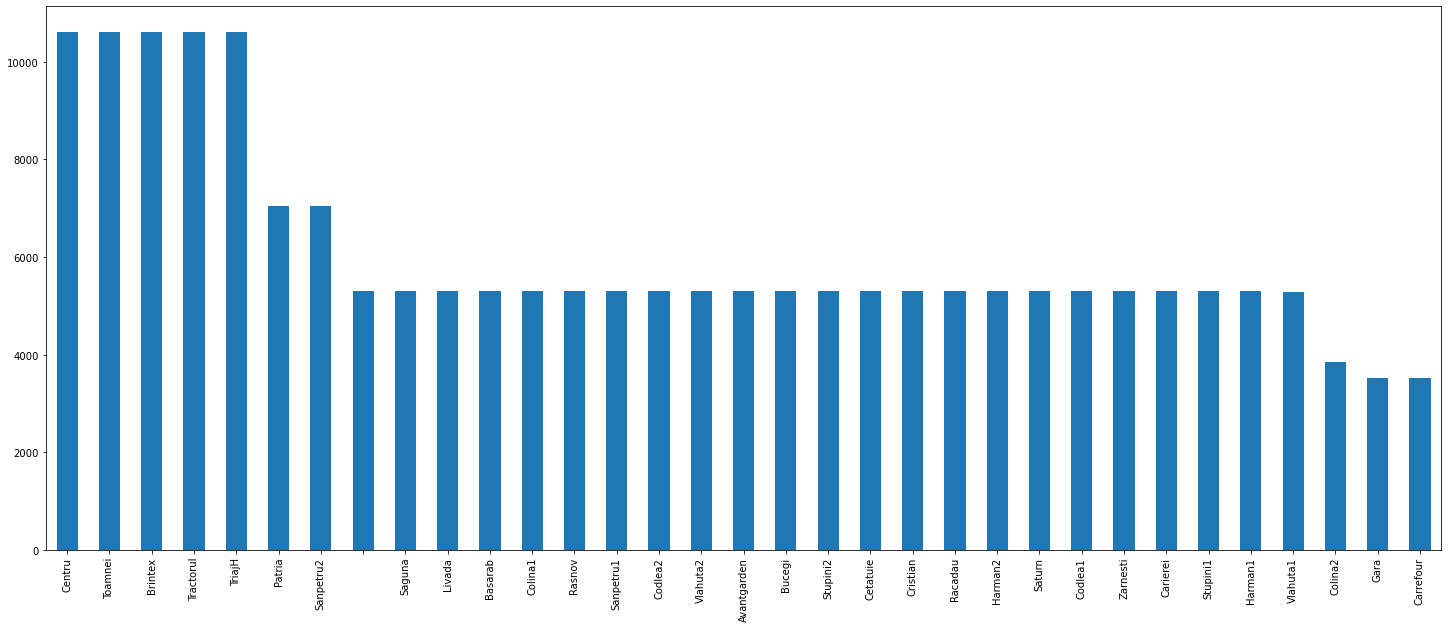

In [13]:
# hist_location = dataframe.get('LocationName').hist()
import matplotlib.pyplot as plt
hist_location = plt.figure(figsize = (25,10))
ax = hist_location.gca()
# dataframe.get('LocationName').hist(ax = ax)

dataframe.get('LocationName').value_counts().plot(kind='bar')
# dataframe.get('LocationName').value_counts(sort=False).plot.bar(rot=0)

In [14]:
dataframe_v2 = dataframe[[i for i in list(dataframe.columns) if i != '_index']]
dataframe_v2 = dataframe_v2[[i for i in list(dataframe_v2.columns) if i != '_type']]
dataframe_v2 = dataframe_v2[[i for i in list(dataframe_v2.columns) if i != '_id']]
dataframe_v2 = dataframe_v2[[i for i in list(dataframe_v2.columns) if i != '_score']]
dataframe_v2 = dataframe_v2[[i for i in list(dataframe_v2.columns) if i != 'sort']]
dataframe_v2.head(7)
# dataframe_v2

,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement,LocationId,LocationName
0,Waqi,no2,1.2,45.716700,25.633300,1648818000000,µg/m3,713500000.0,Sanpetru2
1,Waqi,so2,1.4,45.716700,25.633300,1648818000000,µg/m3,713500000.0,Sanpetru2
2,Waqi,pm10,11.0,45.716700,25.633300,1648818000000,µg/m3,713500000.0,Sanpetru2
3,Waqi,no2,6.7,45.654271,25.624061,1648818000000,µg/m3,712783320.0,Vlahuta1
4,UradMonitor,pm25,10.0,45.653600,25.599000,1648818000000,µg/m3,712526000.0,Colina1
5,UradMonitor,pm1,2.0,45.653600,25.599000,1648818000000,µg/m3,712526000.0,Colina1
6,UradMonitor,pm10,12.0,45.653600,25.599000,1648818000000,µg/m3,712526000.0,Colina1


In [15]:
cho2 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'cho2']
co2 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'co2']
no2 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'no2']
o3 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'o3']
pm1 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'pm1']
pm10 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'pm10']
pm25 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'pm25']
so2 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'so2']

In [16]:
print('Lungime dataframe: ',len(dataframe_v2))
print('Lungime dataframe cho2: ',len(cho2))
print('Lungime dataframe co2: ',len(co2))
print('Lungime dataframe no2: ',len(no2))
print('Lungime dataframe o3: ',len(o3))
print('Lungime dataframe pm1: ',len(pm1))
print('Lungime dataframe pm10: ',len(pm10))
print('Lungime dataframe pm25: ',len(pm25))
print('Lungime dataframe so2: ',len(so2))

Lungime dataframe:  200000
Lungime dataframe cho2:  8837
Lungime dataframe co2:  8840
Lungime dataframe no2:  8812
Lungime dataframe o3:  12361
Lungime dataframe pm1:  49015
Lungime dataframe pm10:  57832
Lungime dataframe pm25:  49017
Lungime dataframe so2:  5286


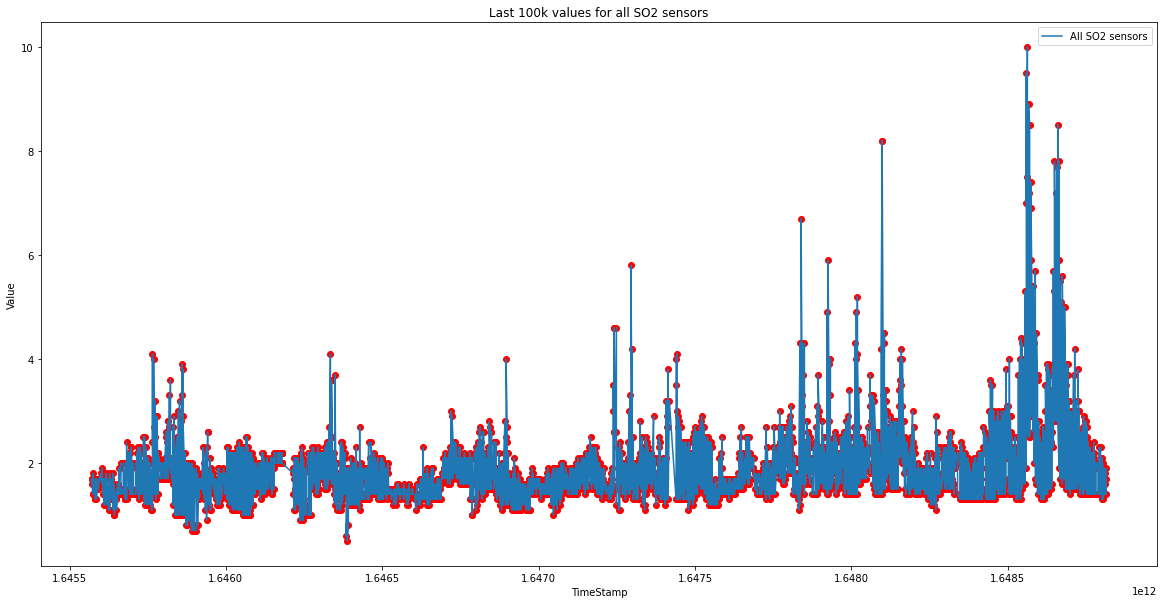

In [ ]:
import matplotlib.pyplot as plt
plt.close("all")
# fig = plt.figure(figsize=(20,10), frameon=True)
plt.figure(figsize=(20,10))
plt.plot(so2.get('_source.TimeStamp'), so2.get('_source.Value'), label="All SO2 sensors")
plt.scatter(so2.get('_source.TimeStamp'), so2.get('_source.Value'), color = "red")
plt.xlabel("TimeStamp")
plt.ylabel("Value")
plt.title("Last 100k values for all SO2 sensors")
plt.legend()
plt.savefig('plots_updated/SO2.jpg', bbox_inches = 'tight')
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [18]:
X = so2[["_source.TimeStamp"]].values
y = so2[["_source.Value"]].values

In [19]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [20]:
y_pred = regressor.predict(X)

In [21]:
print("Slope: ", float(regressor.coef_))
print("Intercept: ", float(regressor.intercept_))
# float("{:.8f}".format(float(regressor.intercept_)))

Slope:  4.8035345759474966e-11
Intercept:  -77.13854005485213


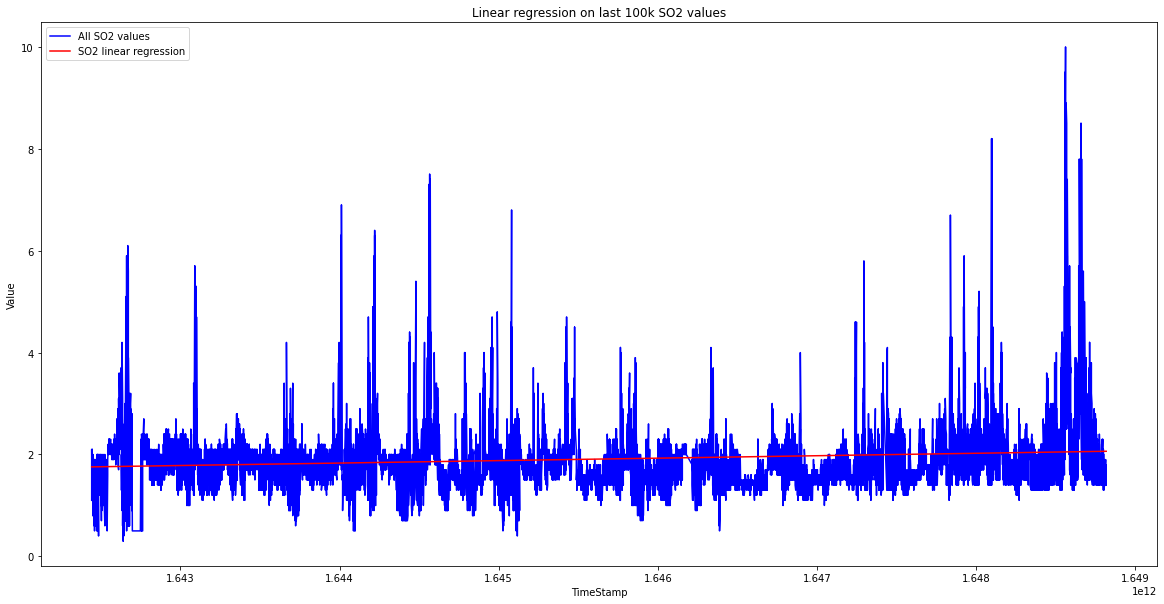

In [22]:
plt.figure(figsize=(20,10))
# plt.scatter(X, y, color = 'blue')
plt.plot(X,y, color = 'blue', label="All SO2 values")
plt.plot(X, regressor.predict(X), color = 'red', label="SO2 linear regression")
plt.title('Linear regression on last 100k SO2 values')
plt.xlabel('TimeStamp')
plt.ylabel('Value')
plt.legend()
plt.savefig('plots_updated/SO2_regression.jpg', bbox_inches = 'tight')
plt.show()

In [23]:
so2.head(6) #Vlahuta1, Centru4, Sanpetru2

,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement,LocationId,LocationName
1,Waqi,so2,1.4,45.716700,25.633300,1648818000000,µg/m3,713500000.0,Sanpetru2
8,Waqi,so2,1.8,45.654271,25.624061,1648818000000,µg/m3,712783320.0,Vlahuta1
11,Waqi,so2,1.8,45.649117,25.604136,1648818000000,µg/m3,712532529.0,Patria
101,Waqi,so2,1.7,45.649117,25.604136,1648814400000,µg/m3,712532529.0,Patria
105,Waqi,so2,1.4,45.716700,25.633300,1648814400000,µg/m3,713500000.0,Sanpetru2
116,Waqi,so2,1.9,45.654271,25.624061,1648814400000,µg/m3,712783320.0,Vlahuta1


In [24]:
so2_vlahuta1 = so2[so2.get('LocationName') == 'Vlahuta1']
so2_patria = so2[so2.get('LocationName') == 'Patria']
so2_sanpetru2 = so2[so2.get('LocationName') == 'Sanpetru2']

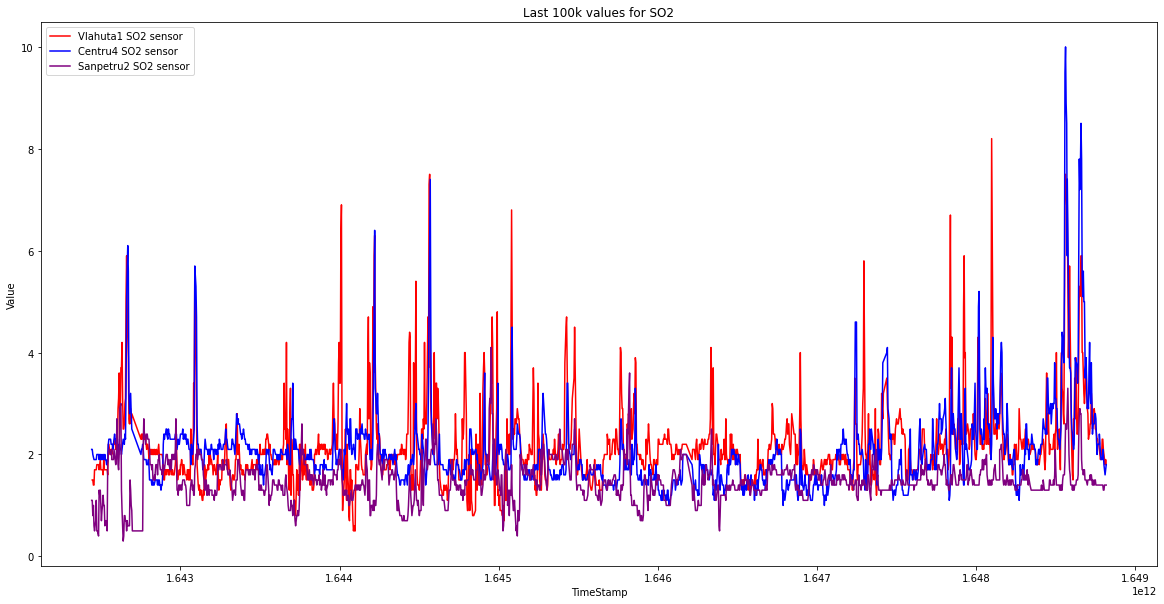

In [25]:
import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
plt.plot(so2_vlahuta1.get('_source.TimeStamp'), so2_vlahuta1.get('_source.Value'), color = "red", label="Vlahuta1 SO2 sensor")
plt.plot(so2_patria.get('_source.TimeStamp'), so2_patria.get('_source.Value'), color = "blue", label="Centru4 SO2 sensor")
plt.plot(so2_sanpetru2.get('_source.TimeStamp'), so2_sanpetru2.get('_source.Value'), color = "purple", label="Sanpetru2 SO2 sensor")
plt.xlabel("TimeStamp")
plt.ylabel("Value")
plt.title("Last 100k values for SO2")
plt.legend()
plt.savefig('plots_updated/SO2_all.jpg', bbox_inches = 'tight')
plt.show()

In [26]:
pm10_carierei = pm10[pm10.get('LocationName') == 'Carierei']
pm10_brintex = pm10[pm10.get('LocationName') == 'Brintex']
pm10_avantgarden = pm10[pm10.get('LocationName') == 'Avantgarden']

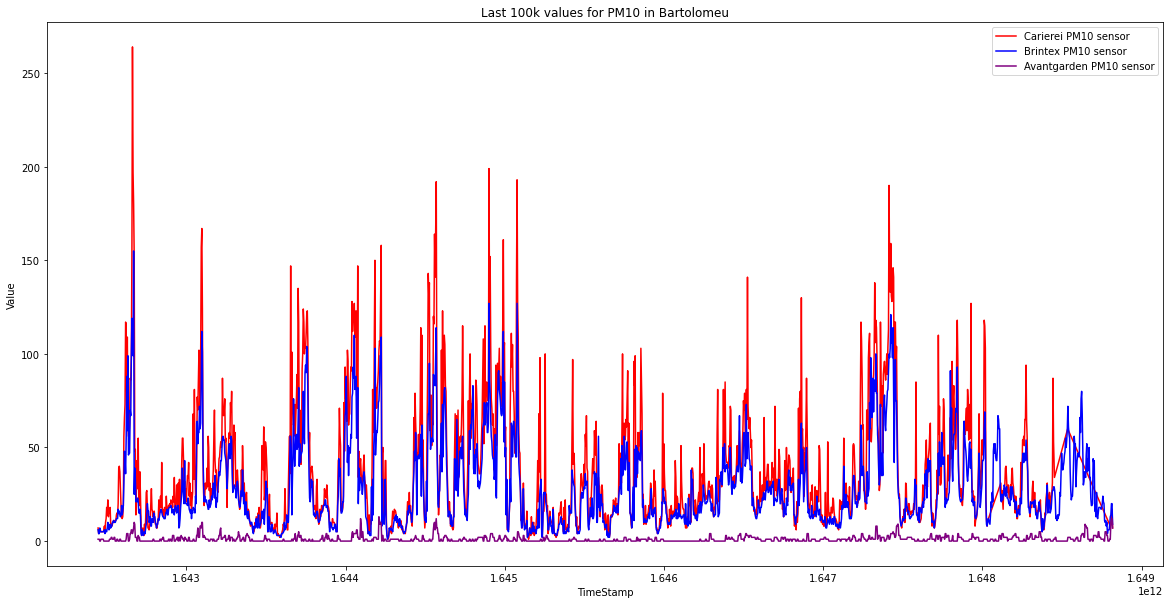

In [27]:
import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
plt.plot(pm10_carierei.get('_source.TimeStamp'), pm10_carierei.get('_source.Value'), color = "red", label="Carierei PM10 sensor")
plt.plot(pm10_brintex.get('_source.TimeStamp'), pm10_brintex.get('_source.Value'), color = "blue", label="Brintex PM10 sensor")
plt.plot(pm10_avantgarden.get('_source.TimeStamp'), pm10_avantgarden.get('_source.Value'), color = "purple", label="Avantgarden PM10 sensor")
plt.xlabel("TimeStamp")
plt.ylabel("Value")
plt.title("Last 100k values for PM10 in Bartolomeu")
plt.legend()
plt.savefig('plots_updated/PM10_Bartolomeu.jpg', bbox_inches = 'tight')
plt.show()

In [28]:
pm10_centru = pm10[pm10.get('LocationName') == 'Centru']
pm10_cetatuie = pm10[pm10.get('LocationName') == 'Cetatuie']
pm10_basarab = pm10[pm10.get('LocationName') == 'Basarab']
pm10_patria = pm10[pm10.get('LocationName') == 'Patria']

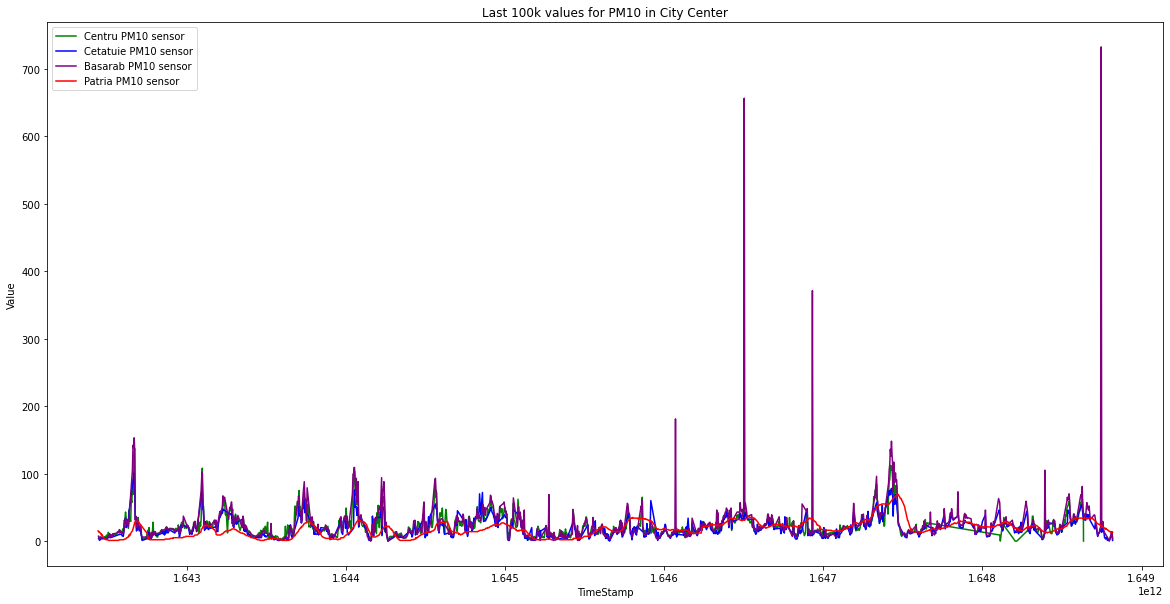

In [29]:
import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
plt.plot(pm10_centru.get('_source.TimeStamp'), pm10_centru.get('_source.Value'), color = "green", label="Centru PM10 sensor")
plt.plot(pm10_cetatuie.get('_source.TimeStamp'), pm10_cetatuie.get('_source.Value'), color = "blue", label="Cetatuie PM10 sensor")
plt.plot(pm10_basarab.get('_source.TimeStamp'), pm10_basarab.get('_source.Value'), color = "purple", label="Basarab PM10 sensor")
plt.plot(pm10_patria.get('_source.TimeStamp'), pm10_patria.get('_source.Value'), color = "red", label="Patria PM10 sensor")
plt.xlabel("TimeStamp")
plt.ylabel("Value")
plt.title("Last 100k values for PM10 in City Center")
plt.legend()
plt.savefig('plots_updated/PM10_Centru.jpg', bbox_inches = 'tight')
plt.show()

In [30]:
pm10_carrefour = pm10[pm10.get('LocationName') == 'Carrefour']
pm10_toamnei = pm10[pm10.get('LocationName') == 'Toamnei']
pm10_gara = pm10[pm10.get('LocationName') == 'Gara']

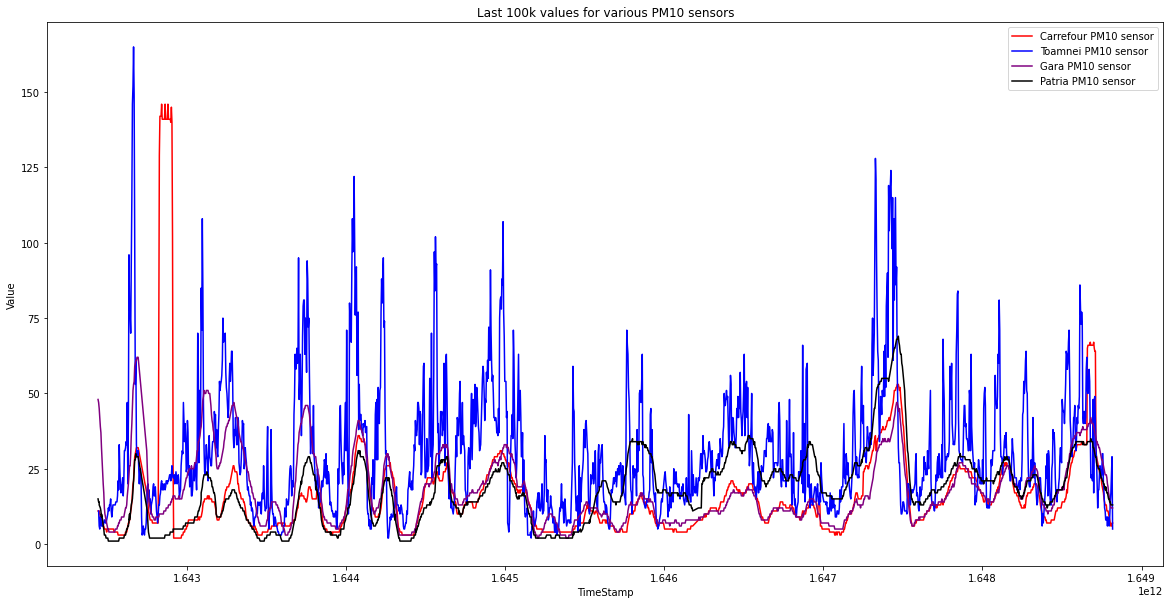

In [31]:
import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
plt.plot(pm10_carrefour.get('_source.TimeStamp'), pm10_carrefour.get('_source.Value'), color = "red", label="Carrefour PM10 sensor")
plt.plot(pm10_toamnei.get('_source.TimeStamp'), pm10_toamnei.get('_source.Value'), color = "blue", label="Toamnei PM10 sensor")
plt.plot(pm10_gara.get('_source.TimeStamp'), pm10_gara.get('_source.Value'), color = "purple", label="Gara PM10 sensor")
plt.plot(pm10_patria.get('_source.TimeStamp'), pm10_patria.get('_source.Value'), color = "black", label="Patria PM10 sensor")
plt.xlabel("TimeStamp")
plt.ylabel("Value")
plt.title("Last 100k values for various PM10 sensors")
plt.legend()
plt.savefig('plots_updated/PM10_strange.jpg', bbox_inches = 'tight')
plt.show()

In [32]:
# pm10_afi.head(30)
pm10_gara.tail(10)

,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement,LocationId,LocationName
198963,Waqi,pm10,20.0,45.659833,25.614488,1642474800000,µg/m3,712743216.0,Gara
199086,Waqi,pm10,24.0,45.659833,25.614488,1642471200000,µg/m3,712743216.0,Gara
199191,Waqi,pm10,28.0,45.659833,25.614488,1642467600000,µg/m3,712743216.0,Gara
199300,Waqi,pm10,32.0,45.659833,25.614488,1642464000000,µg/m3,712743216.0,Gara
199402,Waqi,pm10,37.0,45.659833,25.614488,1642460400000,µg/m3,712743216.0,Gara
199530,Waqi,pm10,39.0,45.659833,25.614488,1642456800000,µg/m3,712743216.0,Gara
199658,Waqi,pm10,42.0,45.659833,25.614488,1642453200000,µg/m3,712743216.0,Gara
199771,Waqi,pm10,45.0,45.659833,25.614488,1642449600000,µg/m3,712743216.0,Gara
199882,Waqi,pm10,47.0,45.659833,25.614488,1642446000000,µg/m3,712743216.0,Gara
199993,Waqi,pm10,48.0,45.659833,25.614488,1642442400000,µg/m3,712743216.0,Gara


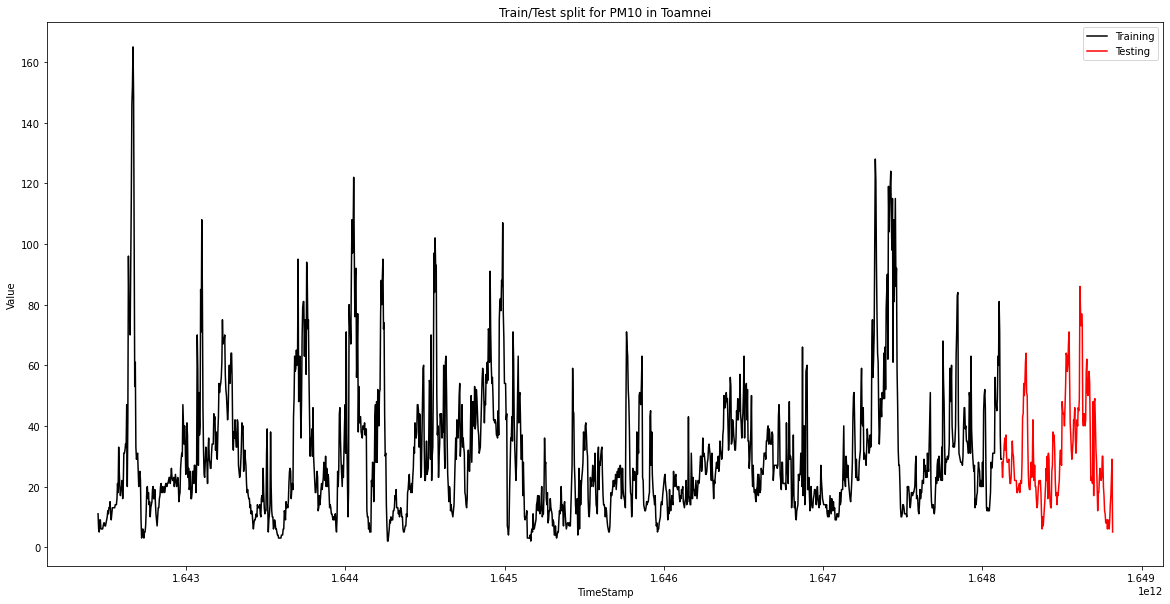

In [33]:
train = pm10_toamnei[pm10_toamnei.get('_source.TimeStamp') < 1648123156000]
test = pm10_toamnei[pm10_toamnei.get('_source.TimeStamp') >= 1648123156000]

import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
plt.plot(train.get('_source.TimeStamp'), train.get('_source.Value'), color = "black", label = "Training")
plt.plot(test.get('_source.TimeStamp'), test.get('_source.Value'), color = "red", label = "Testing")
plt.xlabel("TimeStamp")
plt.ylabel("Value")
plt.title("Train/Test split for PM10 in Toamnei")
plt.legend()
plt.savefig('plots_updated/PM10_Toamnei_Split.jpg', bbox_inches = 'tight')
plt.show()

C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


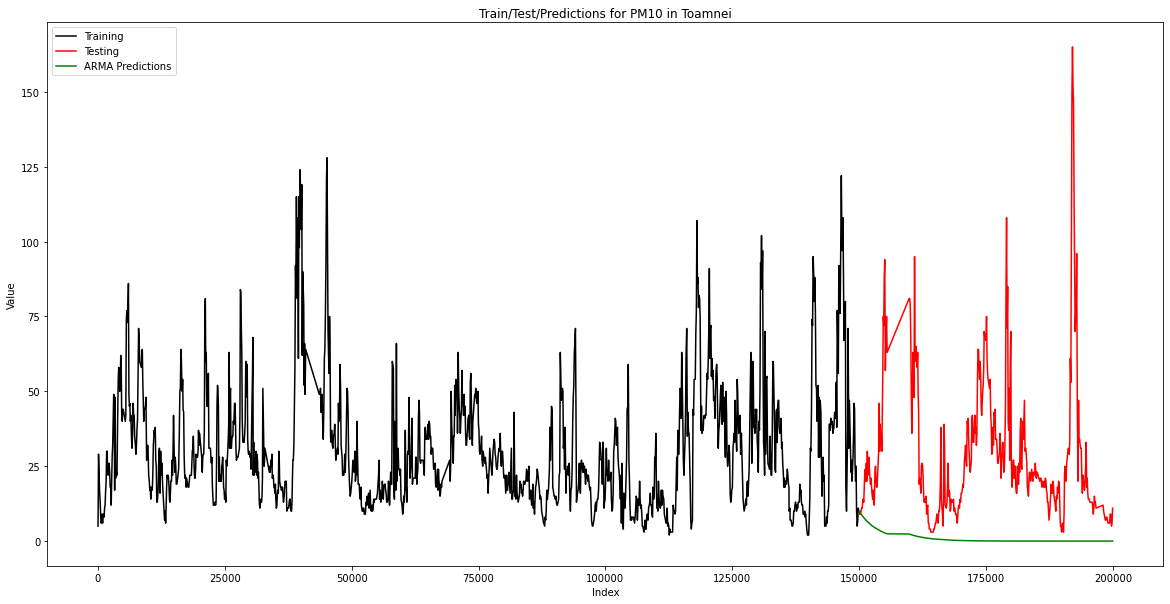

RMSE:  36.83149305847819


In [34]:
pm10_toamnei = pm10[pm10.get('LocationName') == 'Toamnei']
train = pm10_toamnei[pm10_toamnei.index < dataframe_size*(3/4)]
test = pm10_toamnei[pm10_toamnei.index >= dataframe_size*(3/4)]

from statsmodels.tsa.statespace.sarimax import SARIMAX
y = train['_source.Value']

ARMAmodel = SARIMAX(y, order=(1,0,1))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
plt.plot(train.index, train.get('_source.Value'), color = "black", label = "Training")
plt.plot(test.index, test.get('_source.Value'), color = "red", label = "Testing")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Train/Test/Predictions for PM10 in Toamnei")
plt.plot(y_pred_out, color='green', label = 'ARMA Predictions')
plt.legend()
plt.savefig('plots_updated/PM10_Toamnei_ARMA_Prediction.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["_source.Value"].values, y_pred_df["Predictions"]))
print("RMSE: ", arma_rmse)

C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible start

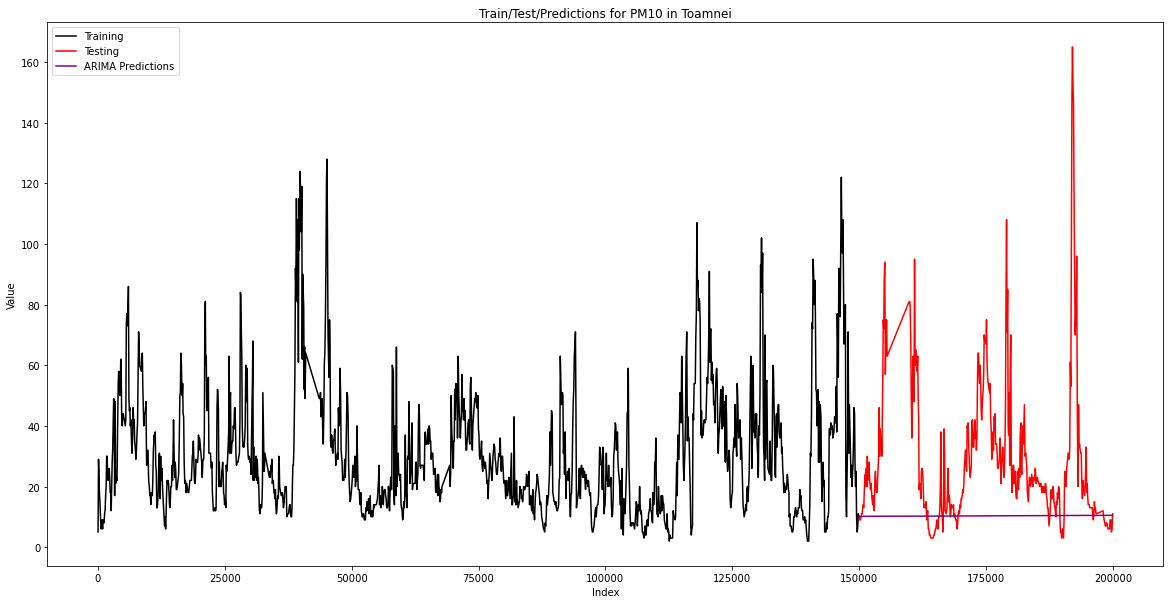

RMSE:  30.18033286685102


In [35]:
pm10_toamnei = pm10[pm10.get('LocationName') == 'Toamnei']
train = pm10_toamnei[pm10_toamnei.index < dataframe_size*(3/4)]
test = pm10_toamnei[pm10_toamnei.index >= dataframe_size*(3/4)]

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
y = train['_source.Value']

ARMAmodel = ARIMA(y, order=(2,2,2))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
plt.plot(train.index, train.get('_source.Value'), color = "black", label = "Training")
plt.plot(test.index, test.get('_source.Value'), color = "red", label = "Testing")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Train/Test/Predictions for PM10 in Toamnei")
plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions')
plt.legend()
plt.savefig('plots_updated/PM10_Toamnei_ARIMA_Prediction1.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

arima_rmse1 = np.sqrt(mean_squared_error(test["_source.Value"].values, y_pred_df["Predictions"]))
print("RMSE: ", arima_rmse1)

C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Predict

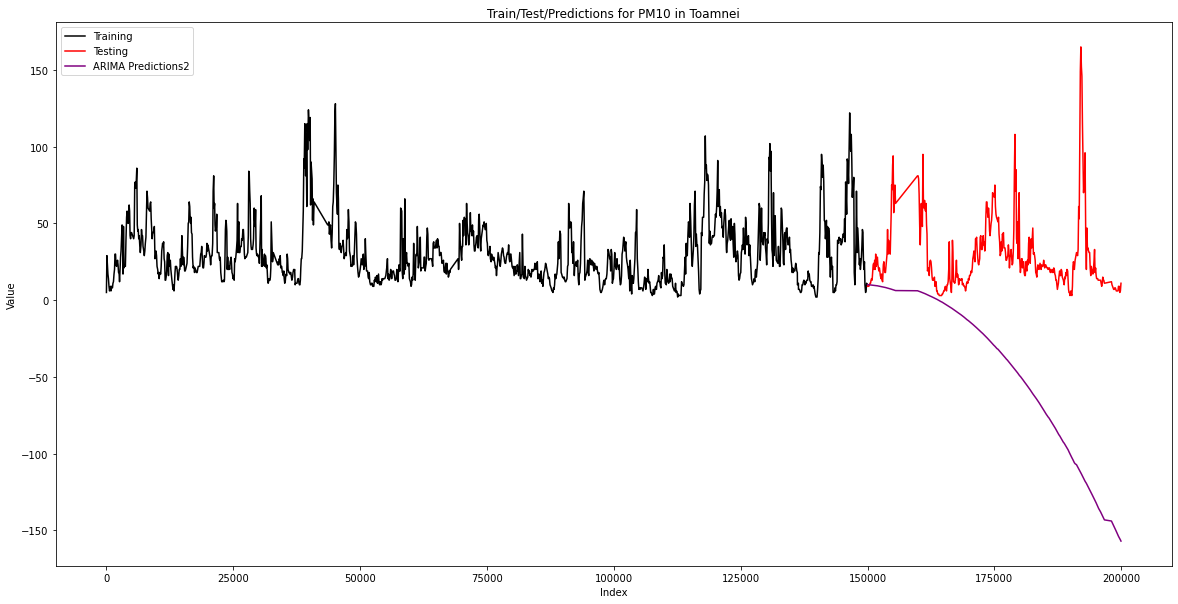

RMSE:  93.33652024915797


In [36]:
pm10_toamnei = pm10[pm10.get('LocationName') == 'Toamnei']
train = pm10_toamnei[pm10_toamnei.index < dataframe_size*(3/4)]
test = pm10_toamnei[pm10_toamnei.index >= dataframe_size*(3/4)]

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
y = train['_source.Value']

ARMAmodel = ARIMA(y, order=(2,3,2))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
plt.plot(train.index, train.get('_source.Value'), color = "black", label = "Training")
plt.plot(test.index, test.get('_source.Value'), color = "red", label = "Testing")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Train/Test/Predictions for PM10 in Toamnei")
plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions2')
plt.legend()
plt.savefig('plots_updated/PM10_Toamnei_ARIMA_Prediction2.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

arima_rmse2 = np.sqrt(mean_squared_error(test["_source.Value"].values, y_pred_df["Predictions"]))
print("RMSE: ", arima_rmse2)

C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to 

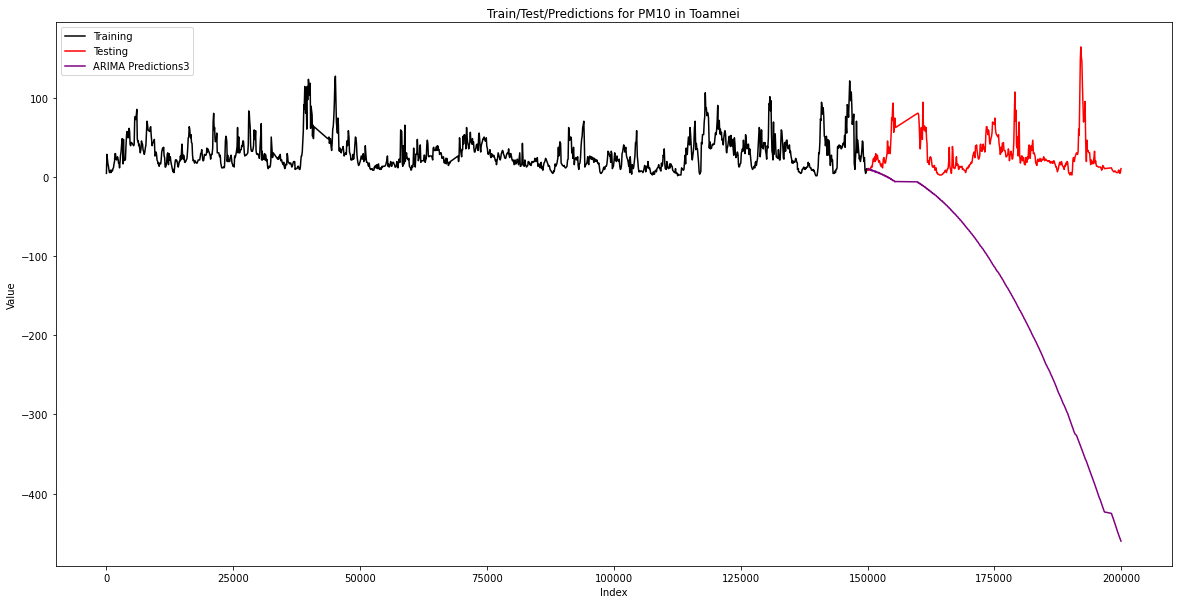

RMSE:  234.56309449158468


In [37]:
pm10_toamnei = pm10[pm10.get('LocationName') == 'Toamnei']
train = pm10_toamnei[pm10_toamnei.index < dataframe_size*(3/4)]
test = pm10_toamnei[pm10_toamnei.index >= dataframe_size*(3/4)]

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
y = train['_source.Value']

ARMAmodel = ARIMA(y, order=(9,3,6))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
plt.plot(train.index, train.get('_source.Value'), color = "black", label = "Training")
plt.plot(test.index, test.get('_source.Value'), color = "red", label = "Testing")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Train/Test/Predictions for PM10 in Toamnei")
plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions3')
plt.legend()
plt.savefig('plots_updated/PM10_Toamnei_ARIMA_Prediction3.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

arima_rmse3 = np.sqrt(mean_squared_error(test["_source.Value"].values, y_pred_df["Predictions"]))
print("RMSE: ", arima_rmse3)

In [38]:
pm10_livada = pm10[pm10.get('LocationName') == 'Livada']
pm10_zarnesti = pm10[pm10.get('LocationName') == 'Zarnesti']
pm10_saguna = pm10[pm10.get('LocationName') == 'Saguna']

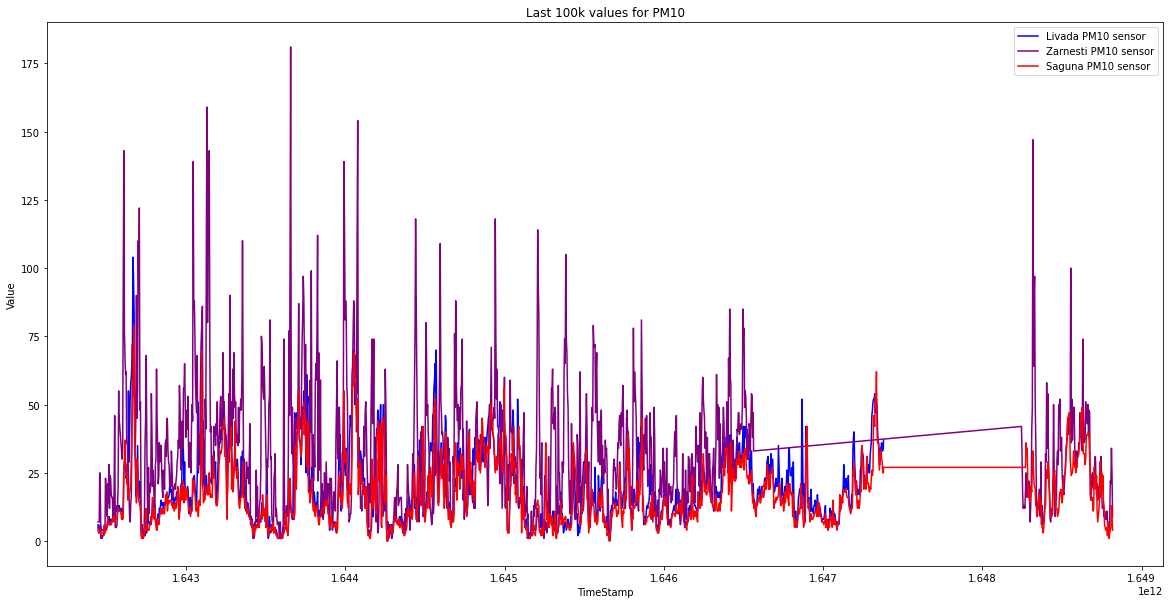

In [39]:
import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
plt.plot(pm10_livada.get('_source.TimeStamp'), pm10_livada.get('_source.Value'), color = "blue", label="Livada PM10 sensor")
plt.plot(pm10_zarnesti.get('_source.TimeStamp'), pm10_zarnesti.get('_source.Value'), color = "purple", label="Zarnesti PM10 sensor")
plt.plot(pm10_saguna.get('_source.TimeStamp'), pm10_saguna.get('_source.Value'), color = "red", label="Saguna PM10 sensor")
plt.xlabel("TimeStamp")
plt.ylabel("Value")
plt.title("Last 100k values for PM10")
plt.legend()
plt.savefig('plots_updated/PM10_Surprise.jpg', bbox_inches = 'tight')
plt.show()

In [41]:
dataframe_v2.tail(10) 

,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement,LocationId,LocationName
199990,Waqi,so2,2.1,45.649117,25.604136,1642442400000,µg/m3,712532529.0,Patria
199991,Waqi,no2,6.9,45.649117,25.604136,1642442400000,µg/m3,712532529.0,Patria
199992,Waqi,pm10,15.0,45.649117,25.604136,1642442400000,µg/m3,712532529.0,Patria
199993,Waqi,pm10,48.0,45.659833,25.614488,1642442400000,µg/m3,712743216.0,Gara
199994,Waqi,no2,8.4,45.659833,25.614488,1642442400000,µg/m3,712743216.0,Gara
199995,Waqi,pm10,11.0,45.634330,25.633872,1642442400000,µg/m3,712682018.0,Carrefour
199996,Waqi,no2,2.8,45.716700,25.633300,1642442400000,µg/m3,713500000.0,Sanpetru2
199997,Waqi,pm10,36.0,45.716700,25.633300,1642442400000,µg/m3,713500000.0,Sanpetru2
199998,Waqi,so2,1.1,45.716700,25.633300,1642442400000,µg/m3,713500000.0,Sanpetru2
199999,Waqi,no2,5.5,45.634330,25.633872,1642442400000,µg/m3,712682018.0,Carrefour


In [42]:
dataframe_v2.to_csv('dataframe_200k_utf.csv', encoding='utf-8')
dataframe_v2.to_csv('dataframe_200k.csv')